# US Used Cars Exploratory Data Analysis

![.](https://i.imgur.com/rELjlak.jpg)


### Introduction

In this project, we will analyze the US Used Cars Dataset from Kaggle. This dataset has over 3 million data in 66 columns. We'll use 19 columns for our exercise.

The main objective of this project is to get a better understanding of the used car market in the US by applying the data analysis & visualization skills to the real-world dataset.

Here is an outline of the steps we'll follow:

* Downloading a dataset from an online source.
* Data preparation and cleaning
* Open-ended exploratory analysis and visualization.
* Asking and answering interesting questions.
* summarizing inferences and conclusion.


Before we dive into our exercise, Let's look at the columns we are going to analyze.

* **vin**: Vehicle Identification Number is a unique encoded string for every vehicle.
* **body_type**: Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
* **city**: city where the car is listed. Eg: Houston, San Antonio, etc.
* **daysonmarket**: Days since the vehicle was first listed on the website.
* **franchise_dealer**: Whether the dealer is a franchise dealer.
* **mileage**: Mileage of the car when it was advertised.
* **is_new**: If True means the vehicle was launched less than 2 years ago.
* **latitude**: Latitude from the geolocation of the dealership.
* **listeddate**: The date the vehicle was listed on the website. Does not make daysonmarket obsolete. The prices is dayson_market days after the listed date.
* **listing_color**: Dominant color group from the exterior color.
* **listing_id**: Listing id from the website.
* **longitude**: Longitude from the geolocation of the dealership.
* **make_name**: Make of the car.
* **maximum_seating**: Seating capacity of the car.
* **engine_type**: The engine configuration. Eg: I4, V6, etc.
* **price**: price of the vehicle.
* **seller_rating**: Rating of the seller who advertised the vehicle.
* **year**: Car manufacturing year. 
* **fuel_type**: Dominant type of fuel ingested by the vehicle.

### What is Exploratory data analysis?

 Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
 
 John Tukey defined data analysis in 1961 as: "Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="eda-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/darshandesai/eda-project


'https://jovian.ai/darshandesai/eda-project'

## Importing the Libraries:

In [129]:
!pip install opendatasets --upgrade --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import opendatasets as od
import folium
import plotly.express as px
%matplotlib inline
sns.set_style("darkgrid")

## Downloading the dataset from Kaggle

Here we are going to download Kaggle dataset using `opendatasets` library. `opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [6]:
download_url = 'https://www.kaggle.com/ananaymital/us-used-cars-dataset'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darshandes
Your Kaggle Key: ··········


100%|██████████| 2.13G/2.13G [00:32<00:00, 70.5MB/s]


In [7]:
data_filename = './us-used-cars-dataset/used_cars_data.csv'

## Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

In [8]:
df = pd.read_csv(data_filename, usecols=['vin','body_type','city','daysonmarket','franchise_dealer','mileage','is_new',
                                         'latitude','listed_date','listing_color','listing_id','longitude','make_name','maximum_seating','engine_type',
                                         'price','seller_rating','year','fuel_type'])

In [9]:
# preview of the dataset
df.head(5)

,vin,body_type,city,daysonmarket,engine_type,franchise_dealer,fuel_type,is_new,latitude,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,price,seller_rating,year
0,ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,I4,True,Gasoline,True,18.3988,2019-04-06,YELLOW,237132766,-66.1582,Jeep,5 seats,7.0,23141.0,2.8,2019
1,SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,I4,True,Gasoline,True,18.4439,2020-02-15,BLACK,265946296,-66.0785,Land Rover,7 seats,8.0,46500.0,3.0,2020
2,JF1VA2M67G9829723,Sedan,Guaynabo,1233,H4,True,Gasoline,False,18.3467,2017-04-25,UNKNOWN,173473508,-66.1098,Subaru,5 seats,NaN,46995.0,NaN,2016
3,SALRR2RV0L2433391,SUV / Crossover,San Juan,196,V6,True,Gasoline,True,18.4439,2020-02-26,GRAY,266911050,-66.0785,Land Rover,7 seats,11.0,67430.0,3.0,2020
4,SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,I4,True,Gasoline,True,18.4439,2020-04-25,BLACK,270957414,-66.0785,Land Rover,7 seats,7.0,48880.0,3.0,2020


The dataset contains over 3 million real world used cars details. The original dataset has 66 columns but We're selecting 19 columns for this excercise.

Let's view some basic information about the data frame.

In [10]:
df.shape #Return a tuple representing the dimensionality of the DataFrame.

(3000040, 19)

Dataframe has just over 3 million data records in 19 columns.

Now, let's check if there are any duplicate records in the dataframe. If so, let's delete it.

In [11]:
df.duplicated().sum() #checking how many duplicates in total

40

In [12]:
df.drop_duplicates() #droping duplicate from the data frame

,vin,body_type,city,daysonmarket,engine_type,franchise_dealer,fuel_type,is_new,latitude,listed_date,listing_color,listing_id,longitude,make_name,maximum_seating,mileage,price,seller_rating,year
0,ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,I4,True,Gasoline,True,18.3988,2019-04-06,YELLOW,237132766,-66.1582,Jeep,5 seats,7.0,23141.0,2.800000,2019
1,SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,I4,True,Gasoline,True,18.4439,2020-02-15,BLACK,265946296,-66.0785,Land Rover,7 seats,8.0,46500.0,3.000000,2020
2,JF1VA2M67G9829723,Sedan,Guaynabo,1233,H4,True,Gasoline,False,18.3467,2017-04-25,UNKNOWN,173473508,-66.1098,Subaru,5 seats,NaN,46995.0,NaN,2016
3,SALRR2RV0L2433391,SUV / Crossover,San Juan,196,V6,True,Gasoline,True,18.4439,2020-02-26,GRAY,266911050,-66.0785,Land Rover,7 seats,11.0,67430.0,3.000000,2020
4,SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,I4,True,Gasoline,True,18.4439,2020-04-25,BLACK,270957414,-66.0785,Land Rover,7 seats,7.0,48880.0,3.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,SUV / Crossover,Fairfield,16,I4,False,Gasoline,False,38.2418,2020-08-27,SILVER,280498781,-122.0830,Chevrolet,5 seats,41897.0,17998.0,4.272727,2018
3000036,1GNERFKW0LJ225508,SUV / Crossover,Vallejo,171,V6,True,Gasoline,True,38.1102,2020-03-25,BLACK,269431681,-122.2030,Chevrolet,8 seats,5.0,36490.0,4.533333,2020
3000037,3FA6P0HD3GR134062,Sedan,Napa,91,NaN,True,NaN,False,38.2873,2020-06-13,GRAY,274044548,-122.2750,Ford,5 seats,57992.0,12990.0,4.142857,2016
3000038,SAJAJ4BNXHA968809,Sedan,Fairfield,11,I4 Diesel,False,Diesel,False,38.2418,2020-09-01,GREEN,280923167,-122.0830,Jaguar,5 seats,27857.0,26998.0,4.272727,2017


In [13]:
df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   vin               object 
 1   body_type         object 
 2   city              object 
 3   daysonmarket      int64  
 4   engine_type       object 
 5   franchise_dealer  bool   
 6   fuel_type         object 
 7   is_new            bool   
 8   latitude          float64
 9   listed_date       object 
 10  listing_color     object 
 11  listing_id        int64  
 12  longitude         float64
 13  make_name         object 
 14  maximum_seating   object 
 15  mileage           float64
 16  price             float64
 17  seller_rating     float64
 18  year              int64  
dtypes: bool(2), float64(5), int64(3), object(9)
memory usage: 394.8+ MB


In [14]:
 # Converting 'listed_date' column to datetime object
 df['listed_date']=pd.to_datetime(df.listed_date)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   vin               object        
 1   body_type         object        
 2   city              object        
 3   daysonmarket      int64         
 4   engine_type       object        
 5   franchise_dealer  bool          
 6   fuel_type         object        
 7   is_new            bool          
 8   latitude          float64       
 9   listed_date       datetime64[ns]
 10  listing_color     object        
 11  listing_id        int64         
 12  longitude         float64       
 13  make_name         object        
 14  maximum_seating   object        
 15  mileage           float64       
 16  price             float64       
 17  seller_rating     float64       
 18  year              int64         
dtypes: bool(2), datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 394.8+ 

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [16]:
df.describe() 

,daysonmarket,latitude,listing_id,longitude,mileage,price,seller_rating,year
count,3.000040e+06,3.000040e+06,3.000040e+06,3.000040e+06,2.855653e+06,3.000040e+06,2.959168e+06,3.000040e+06
mean,7.605973e+01,3.698414e+01,2.754987e+08,-9.064224e+01,3.114690e+04,2.993337e+04,4.270413e+00,2.017728e+03
std,1.088839e+02,4.996819e+00,8.894123e+06,1.390589e+01,7.458675e+04,1.956617e+04,5.133017e-01,4.178701e+00
min,0.000000e+00,1.834670e+01,1.994620e+07,-1.579280e+02,0.000000e+00,1.650000e+02,1.000000e+00,1.915000e+03
25%,1.400000e+01,3.350920e+01,2.745794e+08,-9.708820e+01,6.000000e+00,1.845100e+04,4.000000e+00,2.017000e+03
50%,3.500000e+01,3.784710e+01,2.785453e+08,-8.724950e+01,8.267000e+03,2.647700e+04,4.341463e+00,2.020000e+03
75%,8.200000e+01,4.100620e+01,2.804553e+08,-8.045490e+01,4.366200e+04,3.822000e+04,4.605263e+00,2.020000e+03
max,3.599000e+03,6.120310e+01,2.820222e+08,-6.607850e+01,9.999999e+07,3.299995e+06,5.000000e+00,2.021000e+03


Let's check for missing values using df.isna() funtion. This function detect's missing values and .sum() returns the sum of the values over the requested axis.

In [17]:
df.isna().sum()

vin                      0
body_type            13543
city                     0
daysonmarket             0
engine_type         100581
franchise_dealer         0
fuel_type            82724
is_new                   0
latitude                 0
listed_date              0
listing_color            0
listing_id               0
longitude                0
make_name                0
maximum_seating     159269
mileage             144387
price                    0
seller_rating        40872
year                     0
dtype: int64

Let's convert above table into percentages and exclude any columns where missing values doesn't exist. 

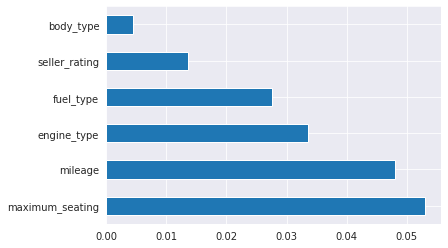

In [18]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages[missing_percentages != 0]
missing_percentages[missing_percentages != 0].plot(kind='barh');

There are 6 columns with the missing values. Let's analyze each column and decide how we are going to proceed with the missing values. 

### body_type : This column is missing aroung 13.5K data recoreds but we cannot assing rendom values to it. We will replace missing values with 'Unknown' value using `fillna` function.

In [19]:
df['body_type'] = df['body_type'].fillna('Unknown')

### seller_rating: There are over 40K data records are missing for this column. Best way to preceed is to remove all the missing rows from the dataframe.

In [20]:
df = df[df['seller_rating'].notna()]

### fuel_type: There are over 82K data record is missing in this column. As majority of the data has a value 'Gasoline'. If we assign 'Gasoline' to replace missing values, it will not make big difference to our analysis as out of 3 million records, 2.5 million are Gasoline.

In [21]:
df.fuel_type.value_counts()

Gasoline                  2563948
Flex Fuel Vehicle          152963
Hybrid                      75356
Diesel                      43760
Biodiesel                   25482
Electric                    16339
Compressed Natural Gas        143
Propane                         6
Name: fuel_type, dtype: int64

In [22]:
df.fuel_type.fillna(value='Gasoline', inplace=True)

### engine_type: We have over 100K data records missing for this columns. As engine types are specific for cars we cannot assign random values so, we will replace nan values with 'Unknown'

In [23]:
df['engine_type'] = df['engine_type'].fillna('Unknown')

### milage: We'll replace the nan values with 0.

In [24]:
df['mileage'] = df['mileage'].fillna(0)

### maximum_seating = This columns has around 160K missing values. Let's analyse this column further before deciding how to proceed further.

In [25]:
df.maximum_seating.value_counts()

5 seats     1850367
7 seats      300985
6 seats      297125
8 seats      198084
4 seats       80223
2 seats       34658
3 seats       29302
15 seats       5837
9 seats        3512
12 seats       1676
10 seats        532
--              486
Name: maximum_seating, dtype: int64

5 seats is the most common value that appears in the data set. Over 1.8 million out of 3 million data records are of '5 seats'. If we assign the '5 seat' value to the missing data records, it will not hamper our analysis. Also, we'll convert this column to numeric type by splitting the values of this column and removing 'seats' from it. Let's first begin by replacing missing values.

In [26]:
df['maximum_seating'].fillna(value='5 seats', inplace=True)

Now, let's split the column and store only the first value and convert the column to numerical type.

In [27]:
df['maximum_seating'] = df.maximum_seating.str.split(' ').str[0]

In [28]:
df.maximum_seating.value_counts()

5     2006748
7      300985
6      297125
8      198084
4       80223
2       34658
3       29302
15       5837
9        3512
12       1676
10        532
--        486
Name: maximum_seating, dtype: int64

We can see that the column includes 486 records of '--' in maximum seating. We have few options on how to deal with it.
* Leave it as it is.
* Replace it with '5 seats' value or any other value.
* Remove these rows.

I will choose 3rd option and remove the rows before converting the column to integer type. 

In [29]:
df = df[df.maximum_seating != '--']

In [30]:
df['maximum_seating'] = df['maximum_seating'].astype(int)

In [31]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/darshandesai/eda-project


'https://jovian.ai/darshandesai/eda-project'

# Exploratory Analysis and Visualization

Let's create a Correlation matrix to understand the 'correlations' between pairs of variables in our data.

We must keep the following points in mind with regards to the correlation matrix.
* All diagonal elements are 1. Since diagonal elements represent the correlation of each variable with itself, it will always be equal to 1.
* A large positive value (near to 1.0) indicates a strong positive correlation.
* A large negative value (near to -1.0) indicates a strong negative correlation.
* A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables.
* Each cell in the above matrix is also represented by shades of a color. Here darker shades of the color indicate smaller values while brighter shades correspond to larger values (near to 1). 

In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,daysonmarket,franchise_dealer,is_new,latitude,listing_id,longitude,maximum_seating,mileage,price,seller_rating,year
daysonmarket,1.000,0.006,0.178,0.017,-0.997,0.012,-0.027,-0.052,0.065,-0.004,0.001
franchise_dealer,0.006,1.000,0.469,0.006,-0.000,0.016,0.023,-0.314,0.279,-0.035,0.490
is_new,0.178,0.469,1.000,-0.045,-0.165,-0.010,-0.013,-0.392,0.378,-0.037,0.554
latitude,0.017,0.006,-0.045,1.000,-0.020,0.170,0.002,0.033,-0.025,0.091,-0.068
listing_id,-0.997,-0.000,-0.165,-0.020,1.000,-0.019,0.026,0.047,-0.061,0.003,0.008
longitude,0.012,0.016,-0.010,0.170,-0.019,1.000,0.000,0.006,-0.027,0.004,-0.016
maximum_seating,-0.027,0.023,-0.013,0.002,0.026,0.000,1.000,0.026,0.122,0.010,0.041
mileage,-0.052,-0.314,-0.392,0.033,0.047,0.006,0.026,1.000,-0.270,0.022,-0.449
price,0.065,0.279,0.378,-0.025,-0.061,-0.027,0.122,-0.270,1.000,0.067,0.354
seller_rating,-0.004,-0.035,-0.037,0.091,0.003,0.004,0.010,0.022,0.067,1.000,-0.048


A few linear relations are visible from the matrix, like the franchise dealer and the year the car was manufactured. It is more likely that the newer car is put on sale by franchise dealers than private sellers.

## Listing_color
This is the exterior color of the car. We can use this field to analyze which color car has the most amount of listings. We'll analyze this using a pie chart.

In [69]:
w = df.groupby(['listing_color']).size()
fig = px.pie(values=w.values, names=w.index)
fig.show()

With 22.2% 'White' is the most listed car color followed by black with 19.6%.

# year
This will tell us the age of the vehicle. We'll use displot to visualize this information.

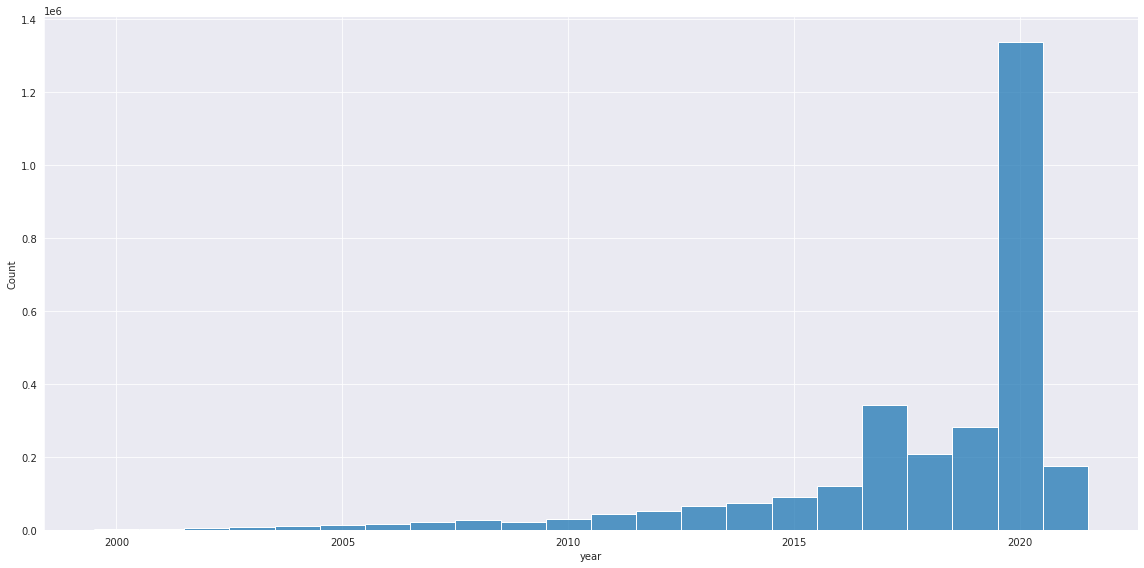

In [34]:
year = df[df['year'] >= 2000] #creating a df where car registered is >= year 2000

#plotting the graph
sns.displot(x=year.year, bins=50, discrete=True, height=8, aspect=2);

So, it can be observed from the above graph that most car listings (over 1.3 million) are from car registered in 2020 followed by 2017 & 2019 (343288, 280978 respectively).

## Relation of price with fuel type, body_type and is_new

In [35]:
df6 = df[df['price'] > 70000] #checking how many cars cost in excess of $70,000
df6.vin.value_counts().sum()

73350

The average cost of new car at the end of 2020 in US was around 40,000 US dollors. In our dataset, there are 73350 car with the value higher than $70,000.

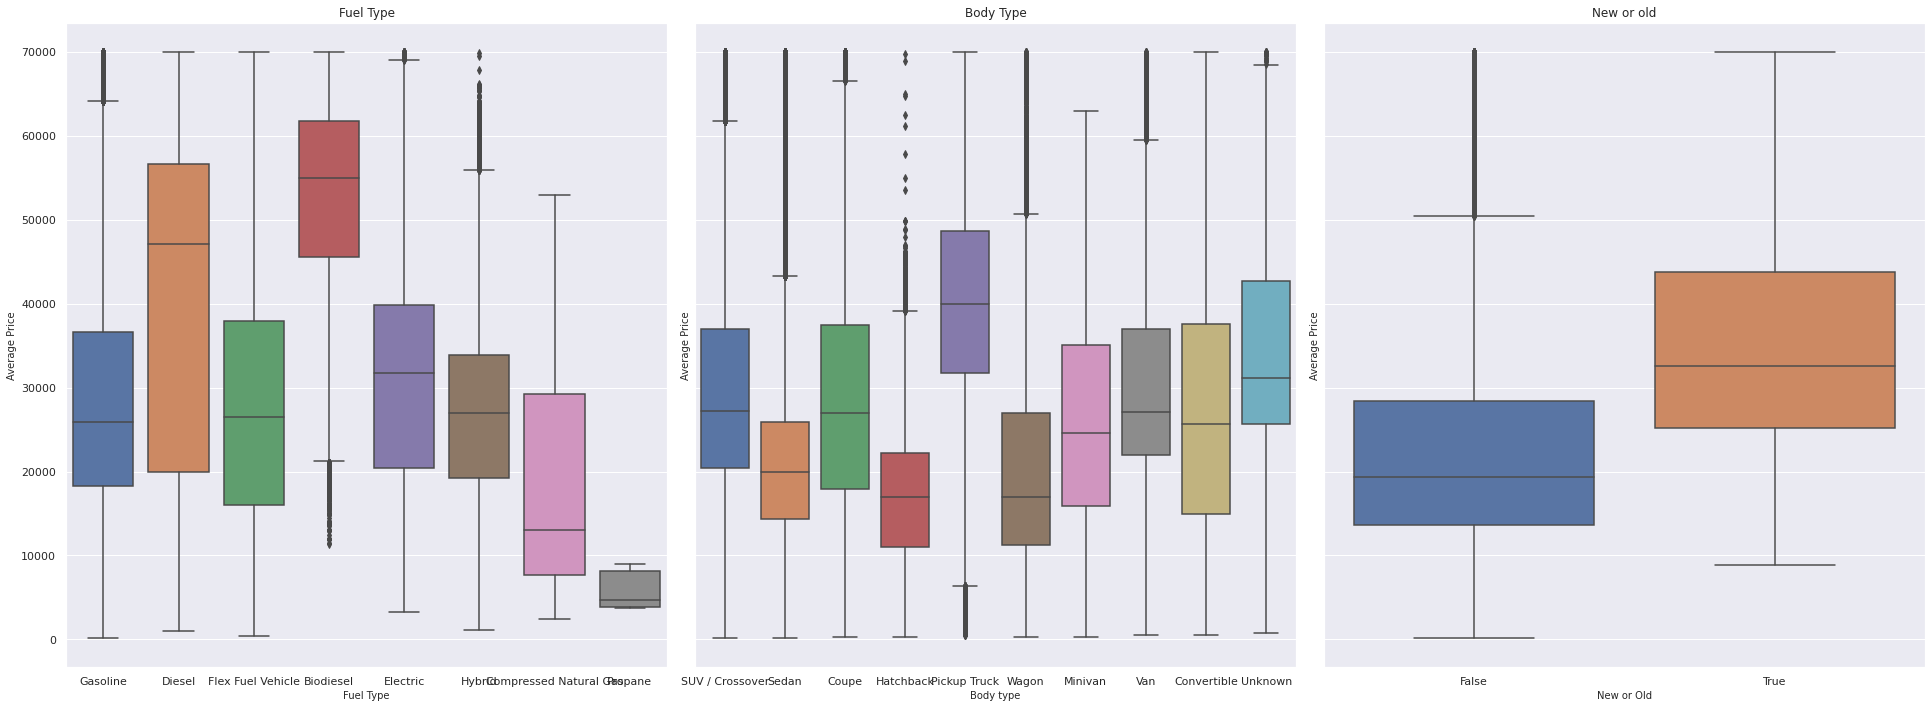

In [96]:
df4 = df[df['price'] < 70000] # creating another df where price < 70000

#plotting the graphs
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(48, 12), sharey=True)

# fuel_type
fig =sns.boxplot(ax=axes[0], y=df4['price'], x=df4['fuel_type'])
axes[0].set_title('Fuel Type')
fig.set_xlabel('Fuel Type', fontsize = 10)
fig.set_ylabel('Average Price', fontsize = 10)

# body_type
fig1 = sns.boxplot(ax=axes[1], y=df4['price'], x=df4['body_type'])
axes[1].set_title('Body Type')
fig1.set_xlabel('Body type', fontsize = 10)
fig1.set_ylabel('Average Price', fontsize = 10)

# is_new
fig2 = sns.boxplot(ax=axes[2], y=df4['price'], x=df4['is_new'])
axes[2].set_title('New or old')
fig2.set_xlabel('New or Old', fontsize = 10)
fig2.set_ylabel('Average Price', fontsize = 10)
plt.gcf().set_size_inches(27, 10)

The average price of gasoline and hybrid vehicles are fairly similar. Electric are costlier than gasoline and hybrid vehicles. Pickup trucks are more expensive compared to other body types and, the prices of the newer vehicles are higher than the older ones.

# Asking and Answering Questions

We've already gained few insights about the US used car market by exploring some invididual columns of the dataset. Let's ask specific questions and try to answer them using data frame operations and visualizations.

## Q: Which car brands have the highest listings?
To answer this quetion, we'll need to use the **value_counts** data frame method to count the total number of listings by car brand and then use **head** method to get the top 20 values only.

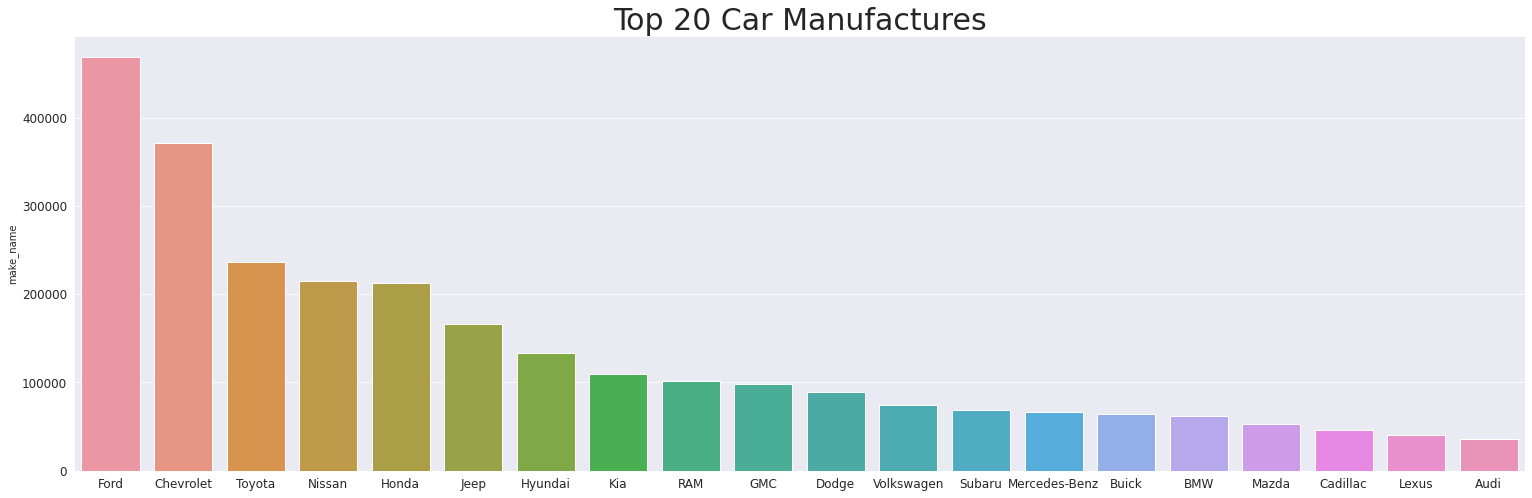

In [37]:
make_name_df = df.make_name.value_counts().head(20) #creating a df with top 20 car manufactures by highest number of listings

#plotting the graph
plt.figure(figsize=(26,8)) #setting the graph size
g = sns.barplot(x=make_name_df.index, y=make_name_df);
g.axes.set_title('Top 20 Car Manufactures',fontsize=30)
g.tick_params(labelsize=12)


It does not come as a surprise as Ford is one of the most popular car brands in the US. In 2020, Ford delivered about 1.9 million units to US customers. Chevrolet & Toyota also have a high number of cars listed. It will be interesting to see if we exclude the new vehicles from the data, will the result be any different? Let's analyze

## Q: What is the impact on the top 20 car brands list if we only look at the old car listings?

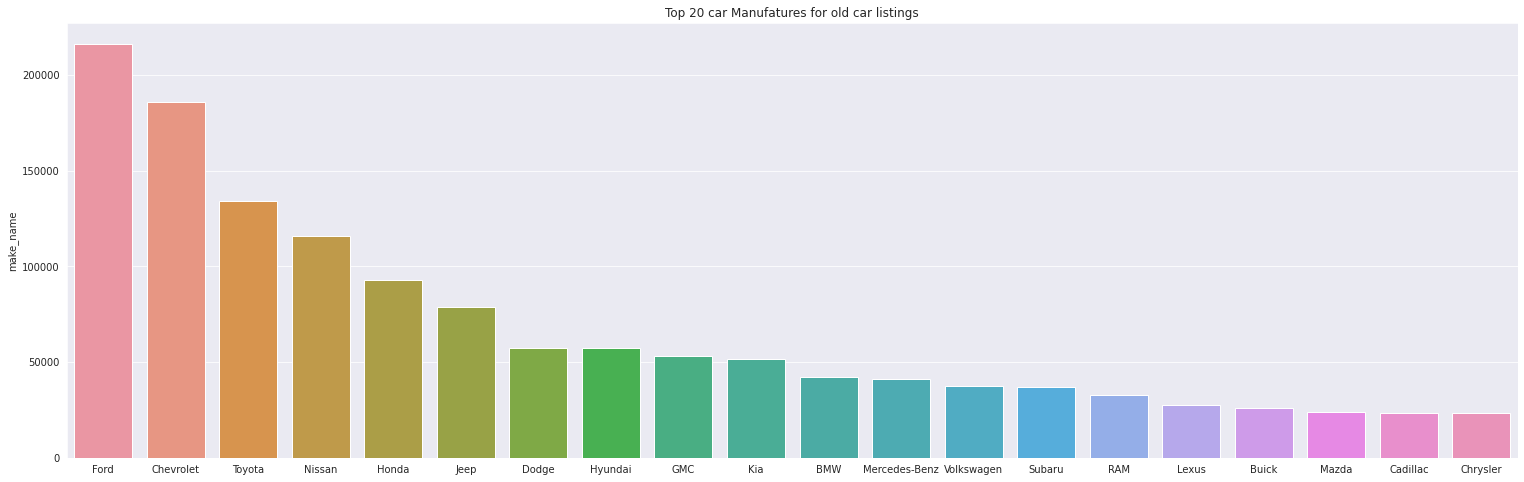

In [38]:
old = df[df['is_new'] == False]
old_df = old.make_name.value_counts().head(20)

#plotting the graph
plt.figure(figsize=(26,8)) #setting the graph size
sns.barplot(x=old_df.index, y=old_df).set_title('Top 20 car Manufatures for old car listings');

Removing the new cars didn't make big difference to the top 20 car brands list. The only change was Chrysler replaced Audi and, the top 6 car brands remained the same. Ford has just over 210K listings meaning over 50% of the listings in the previous graph were of new cars.

## Q: Which is the most sought after car brand in the US used car market?
To answer this question, we are going to analyze the amount of time it takes to sell a car by brand on average. We are going to show top 10 and bottom 10 in two different graphs.

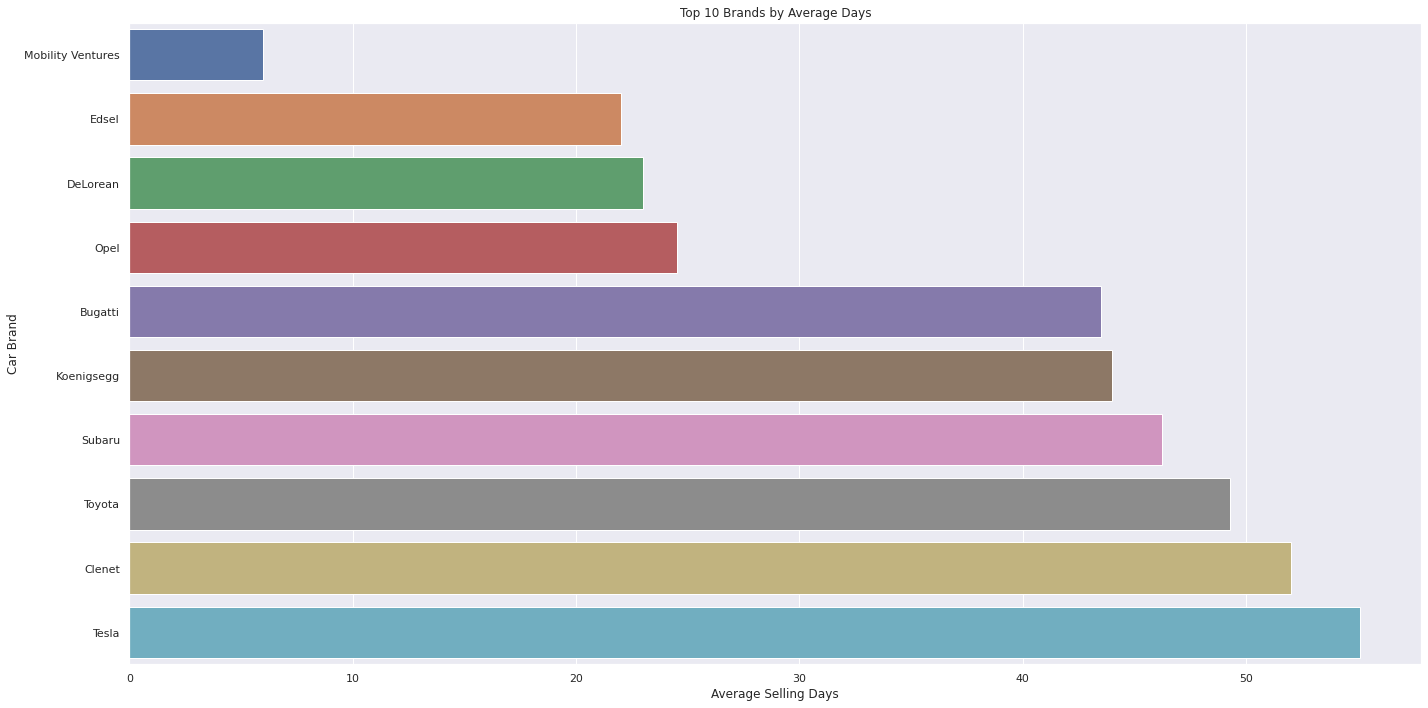

In [118]:
brand_df = df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=True).head(10) #creating df
#plotting the graph
plt.figure(figsize=(20, 10))
b = sns.barplot(y=brand_df.index, x=brand_df).set_title('Top 10 Brands by Average Days')
plt.xlabel('Average Selling Days')
plt.ylabel('Car Brand');

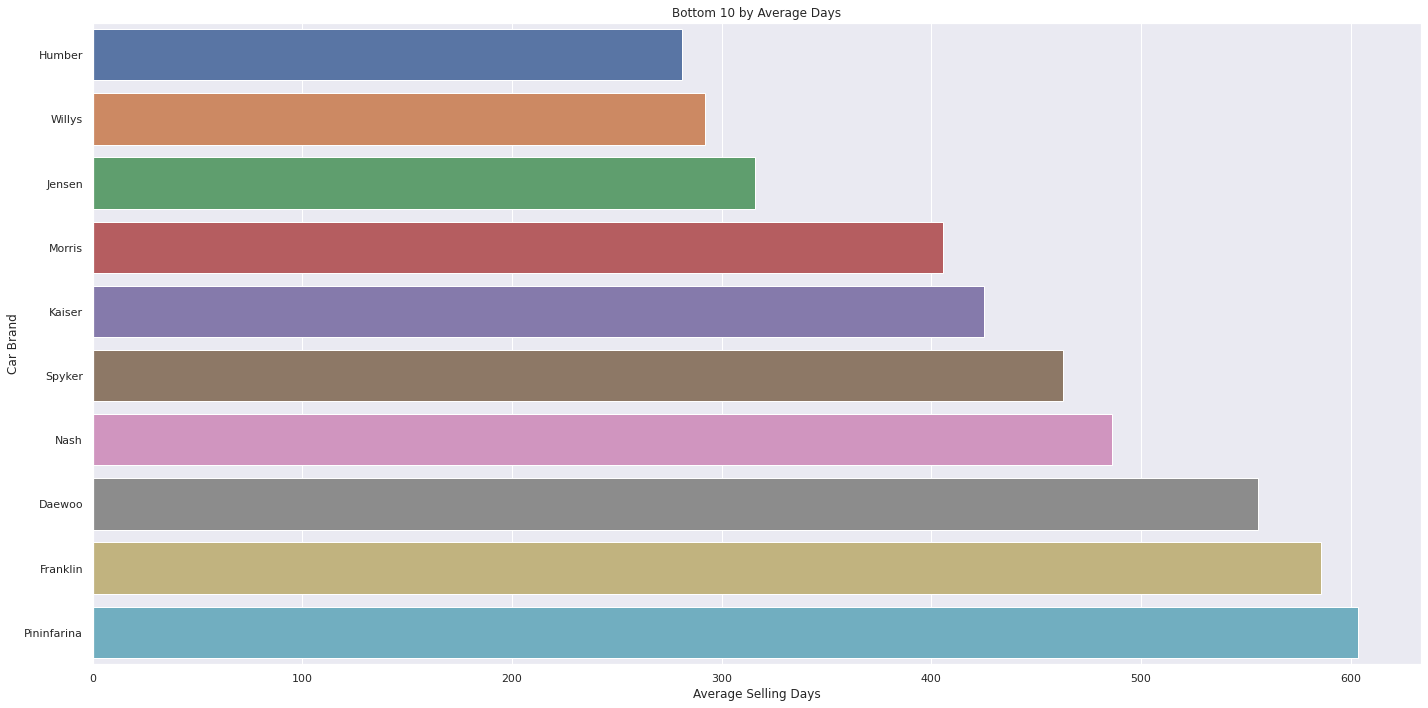

In [119]:
brand1_df = df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=True).tail(10) #creating df
#plotting the graph
plt.figure(figsize=(20, 10))
b = sns.barplot(y=brand1_df.index, x=brand1_df).set_title('Bottom 10 by Average Days')
plt.xlabel('Average Selling Days')
plt.ylabel('Car Brand');

If we say "Mobility Ventures", "Edsel", "DeLorean", & "Opel" are the most popular car brands because it takes less than 25 days to sell, it would not be entirely truthful. We can't assume that based only on how long it takes to sell these vehicles. We also need to take into account other matrices like the number of listings by the brand. Maybe "Mobility Venture" had very few listings that impacted favourably on its average selling days. We need to visualize this information again by adding a few more matrices to get a better insight.

## Q: How does the car prices vary by brands?

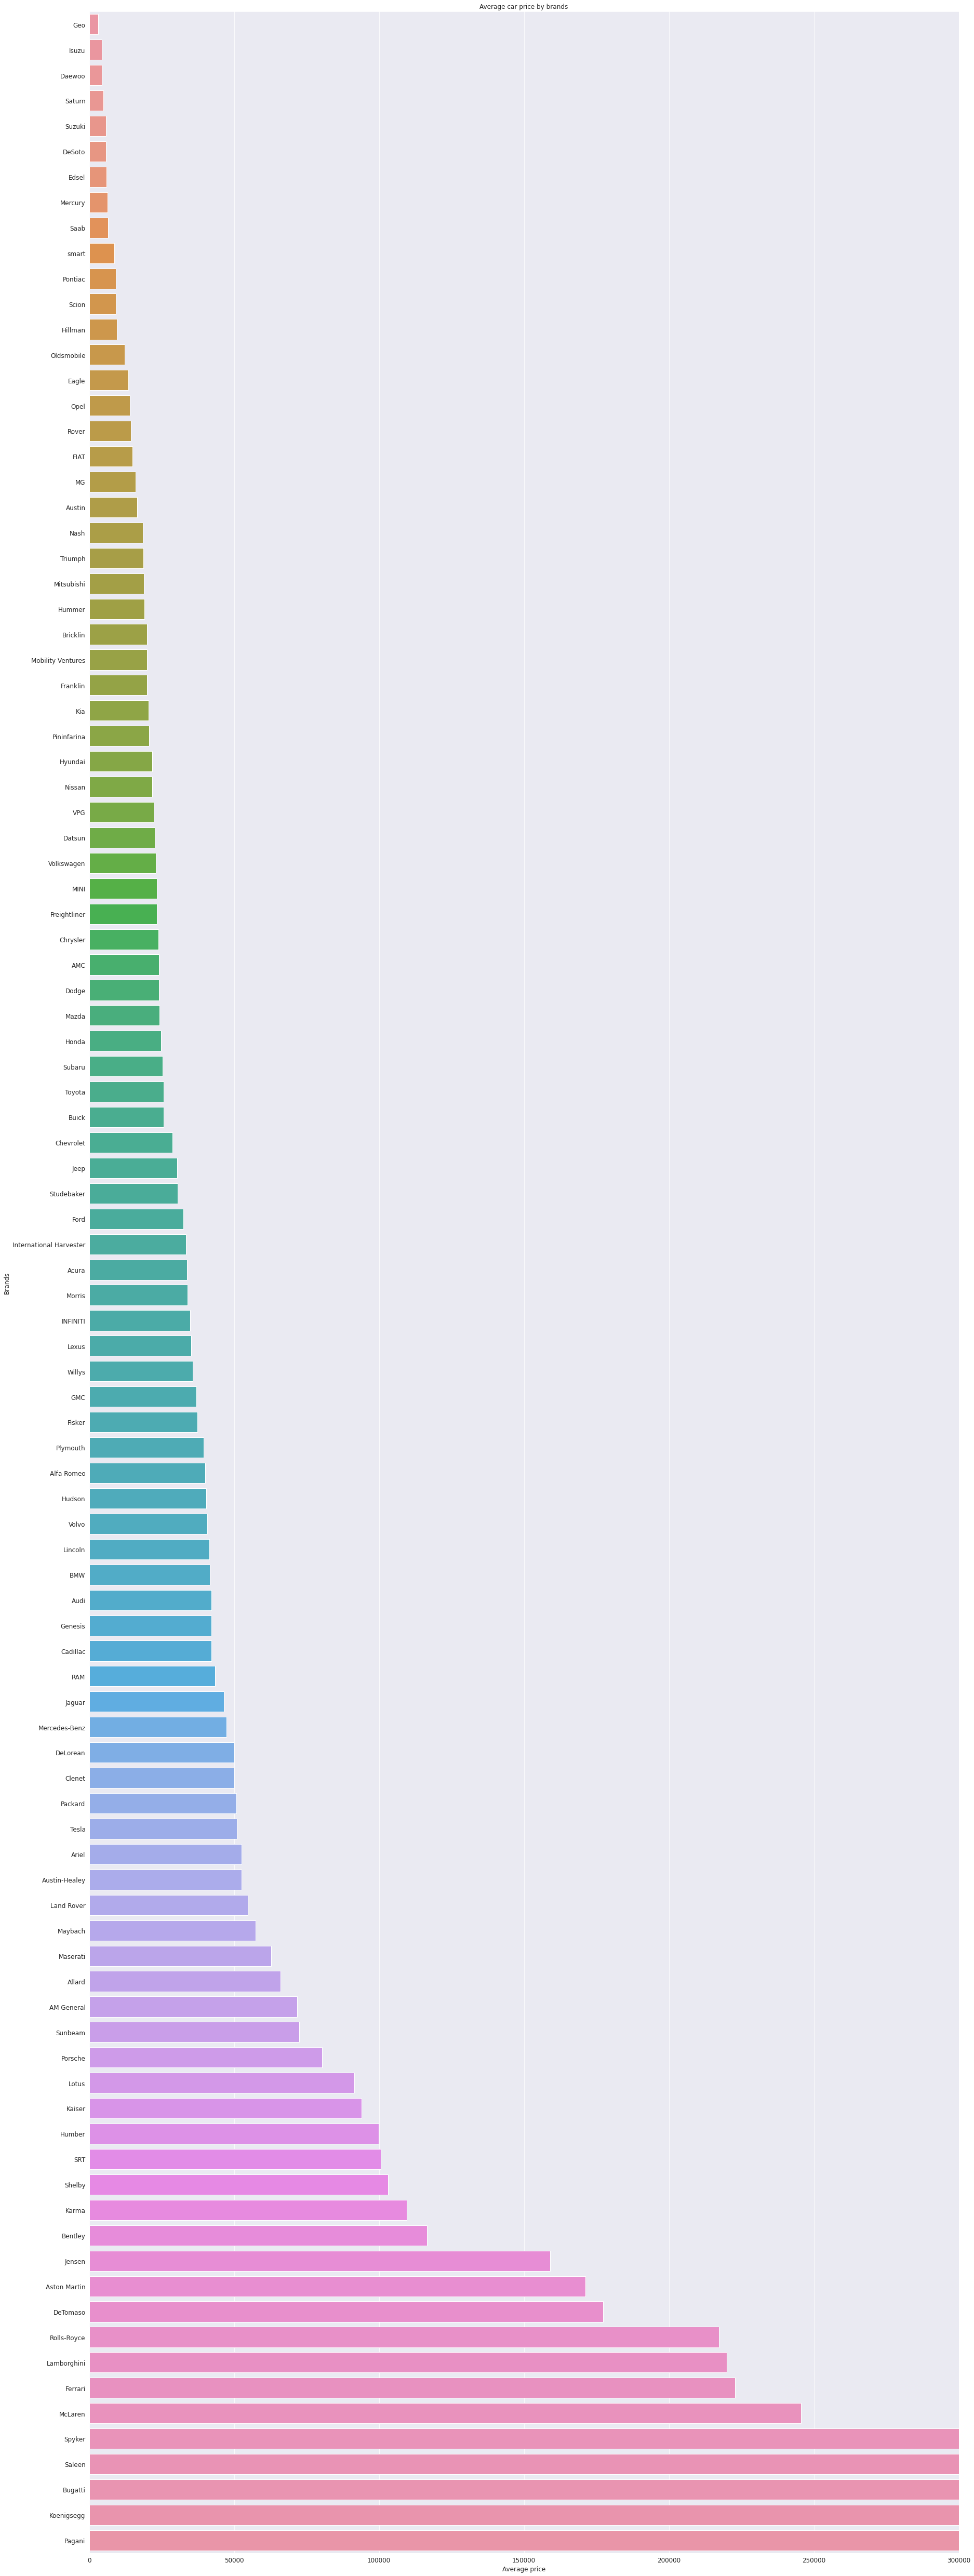

In [40]:
avg_price_df = df.groupby('make_name')['price'].mean().sort_values(ascending=True) #creating a df

#plotting the graph
plt.figure(figsize=(30, 90))
sns.barplot(y=avg_price_df.index, x=avg_price_df).set_title('Average car price by brands')
plt.ylabel('Brands', fontsize =12)
plt.xlabel('Average price', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(0,300000);


As expexted, average prices of the luxury cars like Pagani, koenigsegg, Bugatti etc are highly price. Geo, Isuzu, Daewoo are one of the most affordable cars in the market.

## Q: Which cities have the highest number of listings?
Let's look at the top 20 cities with the highest number of listings and plot them in the chart.

We can identify the cities with the highest number of car listings using the value_counts method and visualize this information using a bar chart.

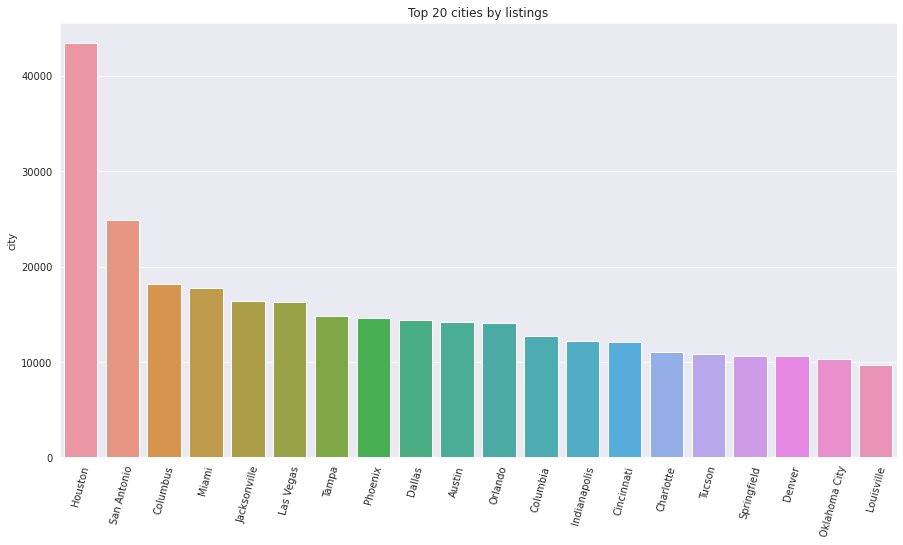

In [41]:
#copy the original df
city_df = df.copy()
#creating top 20 cities by listing df
top_cities = city_df.city.value_counts().head(20)

#plotting the chart
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
sns.barplot(x=top_cities.index, y=top_cities).set_title('Top 20 cities by listings');

We can see that Houston has almost double the number of cars for sale compared to the next best city of San Antonio. It is interesting to see New York not appearing on the top 20 list with most listings. Let's check if New York exist in the data. 

In [42]:
nycity_1 = city_df[city_df['city']=='New York'] #creating a df where city valueis equal to 'New York'.
nycity_1.city.value_counts() # counting the number of listings.

New York    1065
Name: city, dtype: int64

New York does exist in the data frame but, it is surprising to see it has only 1065 listings. Given that New York is the most populated city in the US, It should have more listings. It requires further research to identify the reasons behind the low number of listings in New York.

## Q: What type of vehicle is actively sold on the market and, how long does it take to sell?


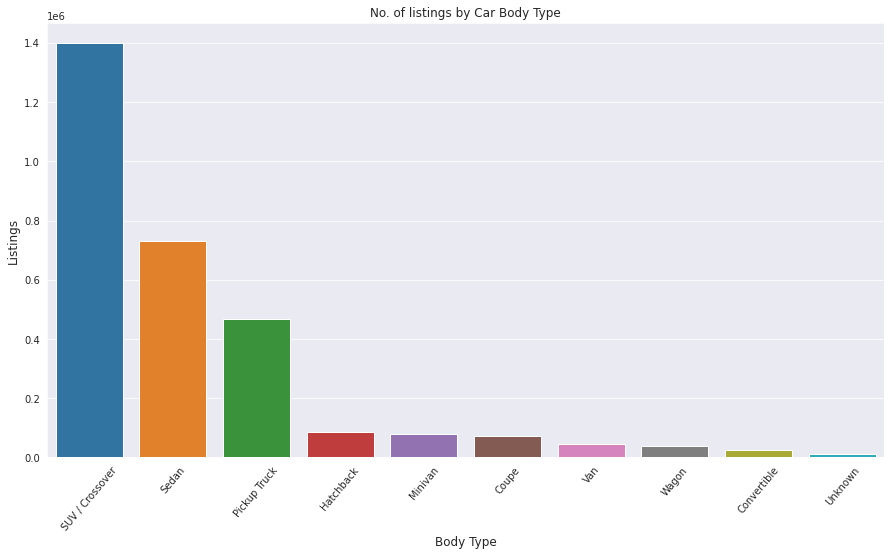

In [43]:
body_type_df = df.body_type.value_counts() #creating a data frame

#plotting the graph
plt.figure(figsize=(15,8))
plt.xticks(rotation=50)
sns.barplot(x=body_type_df.index, y=body_type_df).set_title('No. of listings by Car Body Type')
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Listings', fontsize=12);

Most common type of car for sale is 'SUV/Crossover'. Now let's see how long does this car stays in the market before being sold.

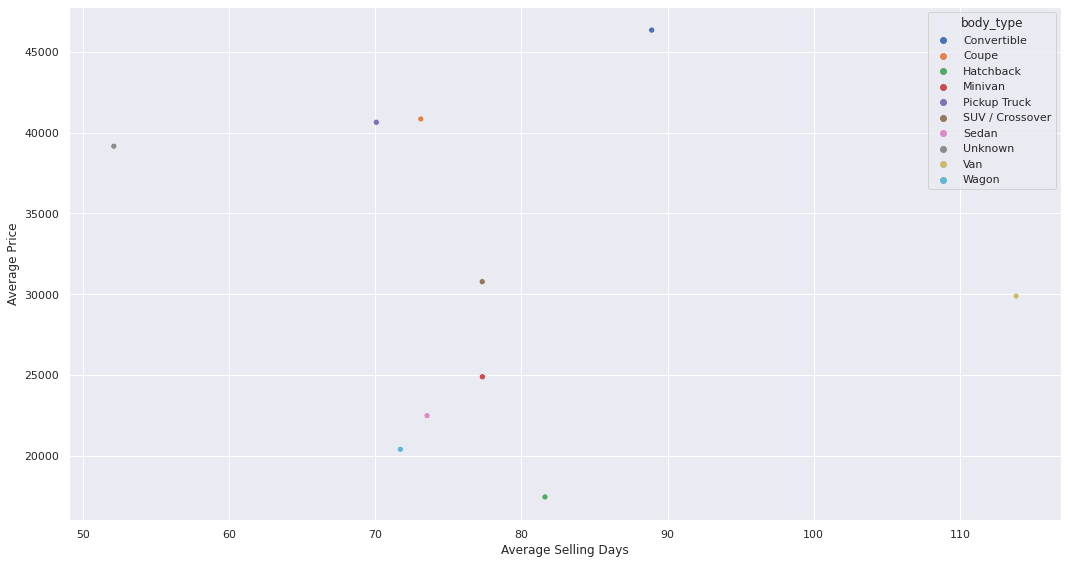

In [122]:
daysonmarket_df = df.groupby(df.body_type).mean()
plt.figure(figsize=(15,8))
sns.scatterplot(x=daysonmarket_df.daysonmarket, y=daysonmarket_df.price, sizes=(40, 40), hue=daysonmarket_df.index)
plt.xlabel('Average Selling Days')
plt.ylabel('Average Price');

We can see that on average, SUV/Crossover takes around 77 days to sell. The quickest selling body_type car is 'Pickup Truck' if we exclude the 'Unknown' type and 'Van' takes longest to sell.

## Q: How does the car price very by different months of the year?

In [124]:
date_df = df.copy() #creat df

#Creating a month and year column based on listed date
date_df['month'] = date_df['listed_date'].dt.month 
date_df['listed_year'] = date_df['listed_date'].dt.year 

#Exclude the outliers 
date_df = date_df[(date_df.price < 70000) & (date_df.listed_year > 2012)]

#Grouping the df by listed year and month, getting average price and resetting the df index
date_df1 = date_df.groupby(['listed_year', 'month'])['price'].mean()
date_df2 = date_df1.reset_index()

#plotting the graph using plotly

fig = px.line(date_df2, x='month', y= 'price', color='listed_year', title='Average car price by month', width=1300, height=500) 
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Price'
)
fig.show()

Here, we can see that the average car prices were highest throughout the year in 2019. During the first quarter of 2020, prices were higher compared to 2019. However, there was a dip in April & May before it improved. In November 2013, average car prices were the highest in all years. It requires further research to identify any particular reason behind it. Overall the average cost of the car is increasing over the years.  

## Q: How does the used car market very in different US regions?

The location of the car is an important factor that can affect the listing price and the number of days it takes to sell. We can use a map to visualize location information. As We have over 3 million data, plotting them all on the map would not be possible. We'll create a map with 200,000 sample data records.

In [130]:
loc_df = df.sample(200000) #creating dataframe with 200,000 sample data.

#importing the required library
from folium import plugins
from folium.plugins import HeatMap

#Make the list of Lat an Lng
lat = loc_df.latitude.tolist()
lng = loc_df.longitude.tolist()

#Create the map
map = folium.Map(location=[41.3883, -89.4652], zoom_start=4.5)
HeatMap(list(zip(lat, lng))).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

We can observe from the sample data, There are more listings in the East of the US and mainly around East Coast. If you're in the East Coast area, you'll have more options to choose from when buying the car.

In [131]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/darshandesai/eda-project


'https://jovian.ai/darshandesai/eda-project'

## Summary
* East Coast of the United States is the most active when it comes to used car listings. If you're based there you'll have a lot more options to choose a car from compared to West Coast.
* Houston has the most amount of listings in the US used car market. It was surprising to see only 1065 listings for New York. Out of top 10 largets US cities by population, only one appears in top 20 by listing list. This requires further research.
* Ford, Chevrolet & Toyota has the most number of listings in the market and the car with most listing has SUV/Crossover body type.
* The majority of the cars are listed is either 'White' or 'Black' in color and are 5 seater.
* On average the car stays in the market for 77 days befor being sold. Pick up trucks are faster moving as it takes around 70 days and the van are the slow moving vehicals which takes aroung 113 day on average.
* Majority of the listed cars are registered in the year 2020. Prices of the new car are relatively higher. If you are looking for a more affordable car then look for a car that is older than two years.
* It does not really matter in which year buying or selling the car as the seasonality does not really affect the price of the car.

## Future work
* Original data set has 66 columns so analysing with more columns will give better insights.
* Price relation with horsepower, wheel_system, transmission etc. will give better understaning on how does this factors affect the pricing of the car.
* Compare the used car market data by seperating premium luxury/performance, first tier luxury, second tier luxury, premium mainstream, mainstrim and budget brands.
* Analyzing which days of the week has the most postings?
* Analyzing location/city/region impact on the pricing by different brands, body type, wheel system and by transmission.
* Pick up truck is the fast selling car but how will it differ if we include listing from the remaining top 10 cities by population?  

#Reference

* https://github.com/JovianML/opendatasets
* https://www.kaggle.com/ananaymital/us-used-cars-dataset
* https://en.wikipedia.org/wiki/Exploratory_data_analysis
* https://likegeeks.com/python-correlation-matrix/
* https://www.cnet.com/roadshow/news/average-new-car-costs-price-increase/
* https://seaborn.pydata.org/index.html
* https://stackoverflow.com/questions/49984575/is-there-a-limit-to-plotting-markers-with-folium
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study
 


In [132]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/darshandesai/eda-project


'https://jovian.ai/darshandesai/eda-project'